In [2]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from nltk.corpus import stopwords
from pymorphy2 import MorphAnalyzer
from tqdm.auto import tqdm
import nltk
import re
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.util import ngrams
import spacy
from spacy.lang.ru.examples import sentences

import inspect
#
# if not hasattr(inspect, 'getargspec'):
#     inspect.getargspec = inspect.getfullargspec

In [3]:
 #Настройка стилей графиков
sns.set(style="whitegrid")

# Загрузка данных из CSV
file_path = 'news.csv'
df = pd.read_csv(file_path, delimiter=';')
df['content'] = df['content'].fillna('')

# Преобразование строк в списки с учетом пустых ячеек
def convert_links(links):
    if pd.isna(links) or links.strip() == '':
        return []
    return ast.literal_eval(links)
# Преобразование строк в списки
df['post_links'] = df['post_links'].apply(convert_links)

# Преобразование столбца 'date' в datetime
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y %H:%M')

In [24]:
from nltk.corpus import stopwords
from pymorphy2 import MorphAnalyzer
from tqdm.auto import tqdm
import nltk
import re


patterns = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"
nltk.download('stopwords')
stopwords_ru = stopwords.words("russian")
morph = MorphAnalyzer()

def lemmatize(doc, return_list=False):
    doc = re.sub(patterns, ' ', doc)
    tokens = []

    for token in doc.split():
        token = token.strip()

        if token and token not in stopwords_ru and token[0]!='@'  and not(token.isascii()):
            token = morph.normal_forms(token)[0]
            tokens.append(token)

    if len(tokens) > 0:
        return tokens if return_list else ' '.join(tokens)

    return ""

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
df_ = df.copy()
df_["content"] = df_["content"].apply(lambda x: lemmatize(x))

In [26]:
text = ""
data_ = df_.sample(df_.shape[0])
for text_sample in data_['content'][:1000]:
    text += f" {text_sample.lower().strip()}"

transformed_text = text.replace(r"\n", "").replace(r"\t", "")

ru_news = spacy.load("ru_core_news_sm")
ru_news.max_length = 3122693
doc = ru_news(transformed_text)

In [27]:
tokens_entities = pd.DataFrame([(token.text, token.ent_type_) for token in doc if token.ent_type_ != ''], columns=['text', 'entity'])

In [28]:
tokens_entities_ = tokens_entities.drop_duplicates(subset=['text'])

In [29]:
tokens_entities_.shape

(2706, 2)

In [30]:
tokens_entities_.groupby(by='entity', as_index=False).agg({'text': 'count'})

,entity,text
0,LOC,409
1,ORG,915
2,PER,1382


In [31]:
for token in tokens_entities_[tokens_entities_['entity'] == 'ORG']['text'][:500]:
  print(token)

сми
ооо
фас
бкс
ввс
роснефти
роснефть
сбербанк
ик
«
рик
траст
»
цб
промсвязьбанк
псб
ммк
ростелеком
аэрофлот
газпром
афк
вк
лср
мтс
сусп
льне
координационный
штаб
лефортово
грати
минобороны
юань
связанный
банк
втб
фрс
национальный
товарный
биржа
федеральный
интервенционный
фонд
минсельхоз
апрель
санкция
столичный
сбс
агро
иф
фсин
росбанк
минфин
демократический
партия
лдп
всу
вс
тнт
интерфакс
мид
дом
пентагон
опек
мурманск
спг
новатэк
транснефти
транснефть
южуралзолото
совкомфлот
росавиация
снг
ренессанс
капитал
смартлаба
международный
финансовый
центр
мфец
сбу
либеральный
инициатива
госдума
либеральной
инициативой
новой
газета
инициативе
социалистический
агентство
медузы
ковчег
инициативы
ковчега
ассоциация
туроператор
ао
автоваз
минпромторг
валютный
мвф
брикс
евротранс
пао
софтлайн
совкомбанк
росстат
минэкономразвития
гк
газпрома
тинькофф
система
систему
яндекс
норникель
норильский
никель
ск
таганрогский
металлургический
завод
тагмета
совет
оборона
резервный
некоторый
государствен

Из токенов, отнесенных к организациям, можно выбрать те, которые интересуют именно нас:

In [42]:
org_entities = [
    'х5', 'магнит', 'сбербанк', 'цб', 'втб', 'мтс', 'лукойл',
    'amazon', 'вк', 'ozon', 'яндекс', 'yandex', 'vk', 'вконтакте', 'тинькофф', 'тбанк',
    'аэрофлот', 'ростелеком', 'газпром', 'автоваз', 'ввс', 'госдума', 'транснефть', 'минфин'
]

In [43]:
entry_cnt = {}
for org_entity in org_entities:
  cnt = 0
  for text in df_['content']:
    if org_entity in text.split():
      cnt += 1
  entry_cnt[org_entity] = cnt

<Axes: >

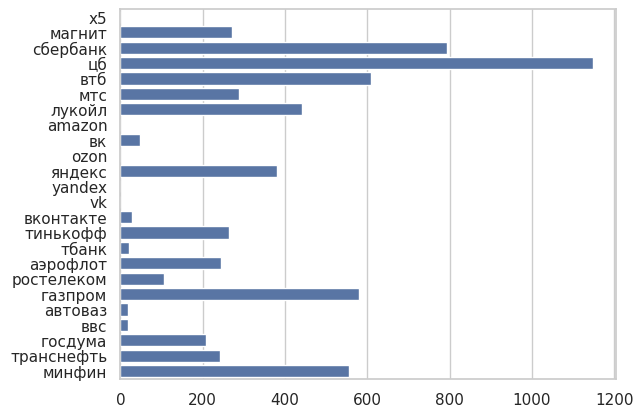

In [44]:
sns.barplot(x=entry_cnt.values(), y=entry_cnt.keys(), orient='h')

In [45]:
for token in tokens_entities_[tokens_entities_['entity'] == 'LOC']['text'][:500]:
  print(token)

дальний
восток
израиль
иран
дамаск
сирия
сша
орск
оренбургский
область
курганский
норвегия
россия
руб
рф
украина
москва
европа
кнр
южный
корея
евросоюз
высоцк
азия
ес
китай
австрия
середина
ногинск
курский
вашингтон
великобритания
нидерланды
кипр
казахстан
астана
селидово
донецкий
народный
республика
португалия
турция
грузия
португалии
европе
франция
литва
польша
бразилия
германия
чехия
бали
индонезия
дубай
доха
денпасар
ижевск
индия
япония
египет
вьетнам
казань
юар
оаэ
саудовский
аравия
санкт
петербург
азиатский
латинский
америка
восточный
норильск
район
кольский
полуостров
забайкальский
край
финляндия
курск
ростовский
монголия
байкал
узбекистан
владимирский
алтайский
запад
кндр
ленинградский
калининградский
ямал
монгольский
импортёр
криптоактив
кремль
чёрный
море
венгрия
австралия
шахтёрский
бульвар
киев
аргентина
поневоле
белоруссия
подмосковье
краснодарский
татарстан
нижегородский
астраханский
беларусь
русский
приморский
россии
красноярск
нижний
новгород
технологический
бояркино
ве

Из токенов, отнесенных к LOC, можно выбрать именно интересующие нас:

In [46]:
loc_entities = [
    'сша', 'рф', 'европа', 'корея', 'франция', 'литва',
    'польша', 'бразилия', 'германия', 'чехия', 'индия', 'япония',
    'китай', 'великобритания', 'португалия', 'италия', 'египет',
    'аргентина'
]

In [49]:
entry_cnt = {}
for loc_entity in loc_entities:
  cnt = 0
  for text in df_['content']:
    if loc_entity in text.split():
      cnt += 1
  entry_cnt[loc_entity] = cnt

<Axes: >

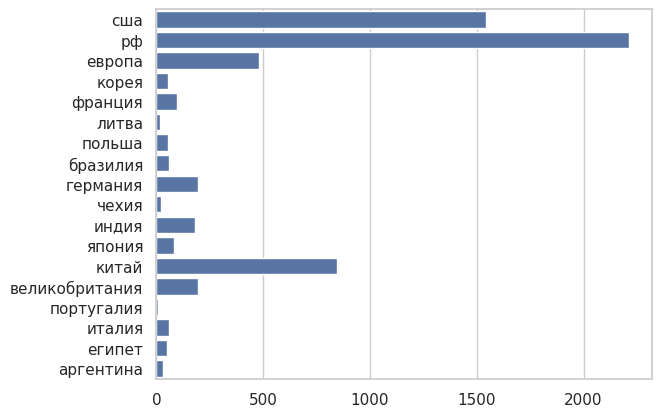

In [50]:
sns.barplot(x=entry_cnt.values(), y=entry_cnt.keys(), orient='h')

# Использование распознавания именнованых сущностей помогает найти дополнительные связи, которые нельзя было автоматически обнаружить при парсинге новостей. Например, упоминание компании или страны в новости. Эти связи могут быть использованы далее для формирования связей между новостями